# 数据类型

In [ ]:
import sys
print(sys.version)

In [ ]:
import tensorflow as tf
print(tf.__version__)

Create a scalar

TensorFlow提供的函数功能，只接受通过TensorFlow规定方式创建的张量。

In [ ]:
#Python Style
a = 1.2
#TF Style
b = tf.constant(1.2)

In [ ]:
type(a), type(b), tf.is_tensor(b)

通过 print(x)或x 可以打印出张量x 的相关信息。

In [ ]:
b

In [ ]:
print(b)

张量numpy()方法可以返回Numpy.array 类型的数据，方便导出数据到系统的其他模块.

In [ ]:
b.numpy() #将TF 张量的数据导出为numpy数组格式
#至此，我们虽没有导入Numpy，但是TensorFlow本身包含了NumPy的支持并提供了类似的API。

In [ ]:
#与标量不同，向量的定义须通过List容器传给tf.constant()函数。
c = tf.constant([1,2.,3.3])
#创建一个元素的向量
d = tf.constant([4.4])

In [ ]:
c

In [ ]:
c.shape

In [ ]:
c.numpy()

在TensorFlow中，创建常量张量时，如果不指定数据类型，TensorFlow会根据输入的数值自动推断数据类型。

In [ ]:
c = tf.constant([1,2.,3.3])

#这里，数组包含整数1和浮点数2.与3.3。
#TensorFlow会自动将1转换为浮点数，因为数组中存在其他浮点数。
#最终的x的类型可能是tf.float32或tf.float64。
#具体取决于TensorFlow的默认配置（通常是tf.float32）
#“2.”后面的浮点用于根据需要来明确数据类型

In [ ]:
#Another Example
d = tf.constant([1,2,3.])

In [ ]:
d

定义矩阵

In [ ]:
a = tf.constant([[1.1,1.2],[2.1,2.2]])

In [ ]:
a, a.shape

三维张量

In [ ]:
a = tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]])

In [ ]:
a, a.shape

字符串类型

In [ ]:
a = tf.constant('Hello, Deep Learning!')

In [ ]:
a

在tf.strings 模块中，提供了常见的字符串类型的工具函数，如小写化lower()、拼接join()、长度length()、切分split()等。

In [ ]:
tf.strings.lower(a)

布尔类型

In [ ]:
#布尔类型标量
a = tf.constant(True)

In [ ]:
a

In [ ]:
#布尔类型向量
a = tf.constant([True,False])

In [ ]:
a

需要注意的是，TensorFlow的布尔类型和Python语言的布尔类型并不等价，不能通用。

In [ ]:
a = tf.constant(True)
a is True #TF布尔类型张量与Python布尔类型比较

In [ ]:
a == True

布尔张量（Boolean tensors）可以进行数值比较。

当使用“==”运算符比较一个布尔张量和一个Python的布尔值（如 True）时，TensorFlow会尝试进行比较，但结果会是一个布尔类型的张量，而不是一个Python布尔对象。

需要使用.numpy()方法或其他方法将结果转换为Python布尔值才能直接在条件语句中使用。

In [ ]:
a = tf.constant(True)
comparison = a == True
print(comparison)
print(comparison.numpy())

数值精度

位越长，精度越高，同时占用的内存空间也就越大。常用的精度类型有tf.int16、tf.int32、tf.int64、tf.float16、tf.float32、tf.float64 等，其中tf.float64 即为tf.double。

In [ ]:
#创建指定精度的张量
tf.constant(123456789, dtype=tf.int16)

保存精度过低时，数据123456789发生了溢出，得到了错误的结果，一般使用tf.int32、tf.int64 精度。

In [ ]:
tf.constant(123456789, dtype=tf.int32)

In [ ]:
#Another Example
import numpy as np

np.pi #从numpy导入pi常量
tf.constant(np.pi, dtype=tf.float32)

In [ ]:
tf.constant(np.pi, dtype=tf.float64)

对于大部分深度学习算法，一般使用tf.int32和tf.float32可满足大部分场合的运算精度要求，部分对精度要求较高的算法，如强化学习某些算法，可以选择使用tf.int64和tf.float64 精度保存张量。

读取精度

对于某些只能处理指定精度类型的运算操作，需要提前检验输入张量的精度类型，并将不符合要求的张量进行类型转换。

In [ ]:
#精度/类型转换
a = tf.constant(1.)
print('before:',a.dtype)
if a.dtype != tf.float16:
    a = tf.cast(a,tf.float16)

print('after:',a.dtype)

进行类型转换时，需要保证转换操作的合法性，例如将高精度的张量转换为低精度的张量时，可能发生数据溢出隐患。

In [ ]:
a = tf.constant(123456789, dtype=tf.int32)
tf.cast(a,tf.int16)

In [ ]:
#Another Example
a = tf.constant([True,False])
tf.cast(a, tf.int32)

In [ ]:
#非0数字都视为True
a = tf.constant([-1,0,1,2])
tf.cast(a, tf.bool)

待优化张量

为了区分需要计算梯度信息的张量与不需要计算梯度信息的张量，TensorFlow增加了一种专门的数据类型来支持梯度信息的记录：tf.Variable。

tf.Variable类型在普通的张量类型基础上添加了name，trainable等属性来支持计算图的构建。由于梯度运算会消耗大量的计算资源，而且会自动更新相关参数，对于不需要的优化的张量，如神经网络的输入𝑿，不需要通过tf.Variable封装；相反，对于需要计算梯度并优化的张量，如神经网络层的𝑾和𝒃，需要通过tf.Variable包裹以便TensorFlow跟踪相关梯度信息。

In [ ]:
a = tf.constant([-1,0,1,2])
b = tf.Variable(a)
b.name, b.trainable

In [ ]:
a = tf.Variable([[1,2],[3,4]])
a

待优化张量可视为普通张量的特殊类型，普通张量其实也可以通过GradientTape.watch()方法临时加入跟踪梯度信息的列表，从而支持自动求导功能。

# 创建张量

In [ ]:
tf.convert_to_tensor([1,2.]) #从列表创建张量

In [ ]:
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) #从数组创建张量

Numpy 浮点数数组默认使用64位精度保存数据，转换到Tensor类型时精度为tf.float64，可以在需要的时候将其转换为tf.float32类型。

tf.constant()和tf.convert_to_tensor()都能够自动的把Numpy数组或者Python列表数据类型转化为Tensor类型。

In [ ]:
tf.zeros([]), tf.ones([]) #创建全0或全1的张量（标量）

In [ ]:
tf.zeros([1]), tf.ones([1]) #创建全0或全1的张量（向量）

In [ ]:
tf.zeros([2,2]), tf.ones([2,2]) #创建全0或全1的张量（矩阵）

创建与张量𝑨形状一样的全0张量。

In [ ]:
a = tf.ones([3,2])
b = tf.zeros_like(a)
b

tf.*_like是一系列的便捷函数，可以通过tf.zeros(a.shape)等方式实现。

In [ ]:
tf.fill([], -1) #创建-1的标量

In [ ]:
tf.fill([1], -1) #创建-1的向量

In [ ]:
tf.fill([2,2], -1) #创建-1的矩阵

In [ ]:
tf.random.normal([2,2]) #创建服从标准正态分布的张量

通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为shape均值为mean，标准差为stddev 的正态分布𝒩(mean, stddev^2)。

In [ ]:
tf.random.normal([2,2], mean=1, stddev=2) #创建服从正态分布的张量

通过tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自[minval, maxval)区间的均匀分布的张量。

In [ ]:
tf.random.uniform([2,2]) #创建采样自[0,1)均匀分布的矩阵

In [ ]:
tf.random.uniform([2,2], maxval=10) #创建采样自[0,10)均匀分布的矩阵

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值maxval参数，同时指定数据类型为tf.int*型。

In [ ]:
tf.random.uniform([2,2], maxval=100, dtype=tf.int32) #创建采样自[0,100)均匀分布的整数矩阵

创建序列

tf.range(limit, delta=1)可以创建[0, limit)之间，步长为delta的整型序列，不包含limit本身。

In [ ]:
tf.range(10, delta=2)

通过tf.range(start, limit, delta=1)可以创建[start, limit)，步长为delta的序列，不包含limit本身。

In [ ]:
tf.range(1, 10, delta=2)

# 索引与切片

在 TensorFlow中，支持基本的[𝑖][𝑗] ⋯标准索引方式，也支持通过逗号分隔索引号的索引方式。

In [ ]:
#假设𝑿为4张32×32大小的彩色图片，shape为[4,32,32,3]。
x = tf.random.normal([4,32,32,3])

In [ ]:
x[0] #取第一张图片

In [ ]:
x[0][1] #取第一张图片的第二行

In [ ]:
x[0][1][2] #第一张图片第二行第三列的数据

In [ ]:
x[0][1][2][1] #第一张图第二行第三列像素的G通道（RGB）

In [ ]:
x[0,1,2,1] #另一种索引形式

通过start:end:step切片方式可以方便地提取一段数据，其中start为开始读取位置的索引，end为结束读取位置的索引(不包含end位)，step为采样步长。

In [ ]:
x[1:3] #读取第二、第三张图片

In [ ]:
x[0,::] #提取第一张图片的所有行，等价于x[0]

为了更加简洁，::可以简写为单个冒号。

In [ ]:
x[:, 0:28:2, 0:28:2, :] #每张图片，隔行采样，隔列采样，所有通道。

#相当于在图片的高宽上各缩放至原来的50%。

step 可以为负数，考虑最特殊的一种例子，当step = −1时，start:end:−1表示从start开始，逆序读取至end 结束(不包含end)，索引号𝑒𝑛𝑑 ≤ 𝑠𝑡𝑎𝑟𝑡。

In [ ]:
x = tf.range(9) #创建0~9向量
x

In [ ]:
x[8:0:-1] #从8取到0，逆序，不包含0

In [ ]:
x[::-1] #逆序全部元素

In [ ]:
x[::-2] #逆序间隔采样

为了避免出现像 [: , : , : ,1]这样过多冒号的情况，可以使用⋯符号表示取多个维度上所有的数据，其中维度的数量需根据规则自动推断：当切片方式出现⋯符号时，⋯符号左边的维度将自动对齐到最左边，⋯符号右边的维度将自动对齐到最右边，此时系统再自动推断⋯符号代表的维度数。

In [ ]:
x = tf.random.normal([4,32,32,3])
x[0:2,...,1:] #读取前两张图片的G/B通道数据

# 维度变换

基本的维度变换操作函数包含了改变视图reshape、插入新维度expand_dims，删除维度squeeze、交换维度transpose、复制数据tile等函数。

In [ ]:
#Reshape
x = tf.range(96)
x = tf.reshape(x, [2,4,4,3])
x

在存储数据时，内存并不支持这个维度层级概念，只能以平铺方式按序写入内存，因此这种层级关系需要人为管理，也就是说，每个张量的存储顺序需要人为跟踪。

可以通过串联多个reshape操作来实现复杂逻辑，但是在通过reshape改变视图时，必须始终记住张量的存储顺序，新视图的维度顺序不能与存储顺序相悖。

In [ ]:
#可以通过张量的ndim和shape成员属性获得张量的维度数和形状
x.ndim, x.shape

In [ ]:
tf.reshape(x, [2,-1]) #−1表示当前轴上长度需要根据张量总元素不变的法则自动推导

增删维度

In [ ]:
x = tf.random.uniform([28,28], maxval=10, dtype=tf.int32)
x

In [ ]:
x = tf.expand_dims(x, axis=2)
x

In [ ]:
x = tf.expand_dims(x, axis=0)
x

tf.expand_dims的axis为正时，表示在当前维度之前插入一个新维度；为负时，表示当前维度之后插入一个新的维度。

以[𝑏, ℎ, , 𝑐]张量为例，不同axis 参数的实际插入位置如图所示:
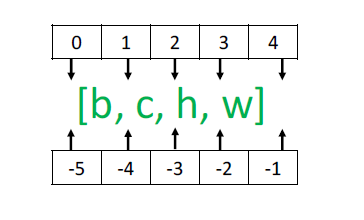


删除维度

In [ ]:
x.shape

In [ ]:
x = tf.squeeze(x, axis=0)
x.shape

In [ ]:
x = tf.squeeze(x, axis=2)
x.shape

In [ ]:
#如果不指定维度参数axis，即tf.squeeze(x)，那么它会默认删除所有长度为1的维度
x = tf.random.uniform([1,28,28,1], maxval=10, dtype=tf.int32) 
tf.squeeze(x)

#建议使用tf.squeeze()时逐一指定需要删除的维度参数，防止TensorFlow意外删除某些长度为1的维度

交换维度

交换维度操作，改变了张量的存储顺序，同时也改变了张量的视图。

In [ ]:
x = tf.random.normal([2,32,32,3])
x = tf.transpose(x, perm=[0,3,1,2])
x.shape

复制数据

可以通过tf.tile(x, multiples)函数完成数据在指定维度上的复制操作，multiples 分别指定了每个维度上面的复制倍数，对应位置为1 表明不复制，为2 表明新长度为原来长度的2 倍，即数据复制一份，以此类推。

In [ ]:
b = tf.constant([1,2]) #向量b
b = tf.expand_dims(b, axis=0) #插入新维度，变成矩阵
b

In [ ]:
b = tf.tile(b, multiples=[2,1]) #multiples是一个列表或元组，表示每个维度要重复的次数
b

上述插入维度和复制数据的步骤并不需要我们手动执行，TensorFlow 会自动完成，这就是自动扩展功能（boradcasting）。

tf.tile会创建一个新的张量来保存复制后的张量，由于复制操作涉及大
量数据的读写IO运算，计算代价相对较高。

Broadcasting

Broadcasting是一种轻量级的复制操作。在逻辑上扩展张量数据的形状，但是只会在需要时才会执行实际存储复制操作。对于大部分场景，Broadcasting机制都能通过优化手段避免实际复制数据而完成逻辑运算，从而相对于tf.tile 函数，减少了大量计算代价。

In [ ]:
x = tf.random.normal([2,4])
w = tf.random.normal([4,3])
b = tf.random.normal([3])

y = x@w + b #不同shape的张量直接相加，会自动扩展shape

#“@”，矩阵乘法运算符，等同于tf.matmul在TensorFlow中的用法。

#上面等效于：y = x@w + tf.broadcast_to(b, [2,3])

自动扩展示意图：

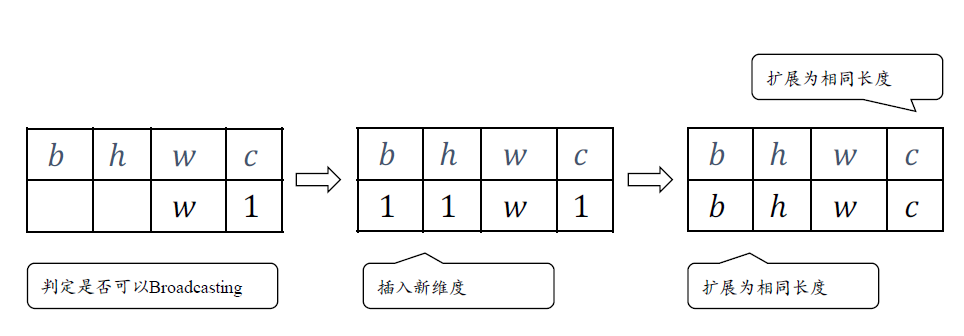

对于长度为1的维度，默认这个数据普遍适合于当前维度的其他位置；对于不存在的维度，则在增加新维度后默认当前数据也是普适于新维度的.

In [ ]:
A= tf.random.normal([32,1])
tf.broadcast_to(A, [2,32,32,3])

在某个靠右的低维度上，张量已经有2个特征数据，新shape 对应维度的长度为3，那么当前维度上的这2个特征无法普适到其它位置，故不满足普适性原则，无法应用Broadcasting 机制，将会触发错误。

In [ ]:
A= tf.random.normal([32,2])
tf.broadcast_to(A, [2,32,32,3])

#Incompatible shapes: [32,2] vs. [2,32,32,3] [Op:BroadcastTo]

In [ ]:
#Another Example
a = tf.random.normal([2,32,32,1])
b = tf.random.normal([32,32])

a+b, a-b, a*b, a/b #这些都支持自动扩展为公共的shape，即[2,32,32,32]

# 数学运算

加、减、乘、除，分别通过tf.add, tf.subtract, tf.multiply, tf.divide函数实现，TensorFlow 已经重载了+、− 、∗ 、/运算符，可以直接使用。

整除和余除也是常见的运算之一，分别通过//和%运算符实现。

In [ ]:
a = tf.range(5)
b = tf.constant(2)
a, b, a // b, a % b #整除与余除

乘方运算

In [ ]:
x = tf.range(4)
x, tf.pow(x, 3), x ** 3

根号运算

In [ ]:
x = tf.constant([1.,4.,9.])
x ** (0.5), tf.pow(x, 0.5)

平方和平方根运算，可以使用tf.square(x)和tf.sqrt(x)实现。

In [ ]:
x = tf.range(5)
y = tf.cast(x, dtype=tf.float32)
x, x.dtype, y, y.dtype, tf.square(y), tf.sqrt(y)

指数和对数运算

In [ ]:
x = tf.constant([1.,2.,3.])
2 ** x, tf.pow(2, x)

In [ ]:
#自然指数e^𝑥，可以通过tf.exp(x)实现
tf.exp(1.)

在TensorFlow中，自然对数ln(x)可以通过tf.math.log(x)实现，计算其他底数的对数，可以借助换底公式。

In [ ]:
x = tf.exp(3.)
tf.math.log(x)

In [ ]:
x = tf.constant([1.,2.])
x = 10 ** x
tf.math.log(x)/tf.math.log(10.) #换底公式

矩阵相乘

TensorFlow中的矩阵相乘通过@运算符或tf.matmul(a, b)函数实现，并可以使用批量方式，也就是张量𝑨和𝑩的维度数可以大于2。当张量𝑨和𝑩维度数大于2时，TensorFlow会选择𝑨和𝑩的最后两个维度进行矩阵相乘，前面所有的维度都视作Batch 维度。

In [ ]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
(a @ b).shape

In [ ]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
tf.matmul(a, b).shape

#矩阵相乘支持Broadcasting

# 前向传播实战

out = 𝑅𝑒𝐿𝑈 {𝑅𝑒𝐿𝑈 {𝑅𝑒𝐿𝑈 [𝑿 @ 𝑾1 + 𝒃1] @ 𝑾2 + 𝒃2} @ 𝑾3 + 𝒃3 }

在这个案例中，采用以上的三层神经网络实现MNIST手写数字图片集的分类与识别。
输入节点为784（28 * 28），通过三层神经网络产生10个节点的输出（对应10个类别），比如，第一层输出节点256，第二层输出节点128，第三层输出节点10。

创建每层的参数张量

In [ ]:
#每层的张量都需要被优化，故使用Variable类型，并使用截断的正太分布初始化权值张量
w1 = tf.Variable(tf.random.truncated_normal([784,256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))

w2 = tf.Variable(tf.random.truncated_normal([256,128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))

w3 = tf.Variable(tf.random.truncated_normal([128,10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

#通常一开始将偏置设为0，因为在训练开始时我们不希望偏置影响太多


tf.random.truncated_normal函数用于从截断的正态分布中抽取值。这意味着如果一个随机数落在分布的两个标准差之外，它将被重新抽取，从而避免极端值。
stddev=0.1指定了这个正态分布的标准差，控制权重初始化的范围。较小的标准差有助于防止梯度消失或爆炸，特别是在深层网络中。

前向计算

首先将shape为[𝑏, 28,28]的输入张量的视图调整为[𝑏, 784]，即将每个图片的矩阵数据调整为向量特征，这样才适合于网络的输入格式。

In [ ]:
x = tf.reshape(x, [-1, 28*28])

In [ ]:
#h1 = x @ w1 + b1，这里进行显式地自动扩展
h1 = x @ w1 + tf.broadcast_to(b1, [x.shape[0], 256])
#激活函数
h1 = tf.nn.relu(h1)

h2 = h1 @ w2 + tf.broadcast_to(b2, [h2.shape[0], 128])
h2 = tf.nn.relu(h2)

#输出层就不需要激活函数了
out = h2 @ w3 + tf.broadcast_to(b3, [h2.shape[0], 10])


将真实的标注张量𝒚转变为One-Hot编码，并计算与out的均方差。

In [ ]:
#计算网络输出与标签之间的均方差，mse = mean(sum(y-out)^2)
loss = tf.square(y_onehot - out)
loss = tf.reduce_mean(loss)

独热编码（one-hot encoding）形式，比如在多类别分类任务中，如果有10个类别，标签会是一个形状为 [batch_size, 10] 的张量，其中每个样本的正确类别位置为1，其它位置为0。

out: 这是模型的输出，通常是神经网络最后一层的激活值，比如使用softmax激活后得到的概率分布，也是一个形状为 [batch_size, 10] 的张量。

y_onehot - out得到两个张量之间的差值，然后使用tf.square对这些差值进行平方操作。这是因为在MSE中，我们希望惩罚大的错误更重，故使用平方。

tf.reduce_mean(loss): 这行代码计算所有样本的损失的平均值。reduce_mean 函数会将一个张量的所有元素相加，然后除以元素的数量，从而得到平均值。这里，它将所有样本的平方误差平均起来，得到一个单一的损失值（标量）。

上述的前向计算过程都需要包裹在with tf.GradientTape() as tape上下文中，使得前向计算时能够保存计算图信息，方便自动求导操作。

In [ ]:
#自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

按照下面的公式更新梯度：
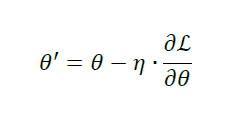

In [ ]:
#assign_sub将当前值减去参数值，原地(in-place)更新
w1.assign_sub(lr * grads[0])
b1.assign_sub(lr * grads[1])
w2.assign_sub(lr * grads[2])
b2.assign_sub(lr * grads[3])
w3.assign_sub(lr * grads[4])
b3.assign_sub(lr * grads[5])
